In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Question:

If we change the atmospheric concentration of CO2 from 280 umol to ~400 umol, what are the effects on the salish sea system? 


### Subquestions:

    1. Does the system as a whole store more carbon?
    2. Does the surface ocean store more carbon?
    2a. Does the upper layer (top 50m?) store more carbon?
    3. How much of the carbon gets exported to the open ocean?
    4. How much gets taken up by phytoplankton? (black box)
        How to measure this? stronger drawdown?
    5. How much gets outgassed?
    
    
    BUDGET:
    
    DIC_strait = DIC_riv + CO2_flux + UPTAKE/REMIN + BOUNDARY_TRANSPORT_JDF + BOUNDARY_TRANSPORT_JS
    Needn't be steady-state
    
## Preliminary notes:

##### The influx of C through JS is MASSIVE! is this a function of the model 'tilt'? may not be a correct number, for several reasons
    
##### 4e10 extra mol C get sent to open ocean at JdF in BR case. 2.7e10 extra mol C get outgassed in PI case...

##### Are we spunup? difference between deep C (BR-PI) keeps increasing. BR year seems spunup - only small changes. 



    

In [5]:
BR_nc = nc.Dataset('MASSBAL_BR2015_to1231_spunup.nc')
PI_nc = nc.Dataset('MASSBAL_PI2015_to1231_spunup.nc')

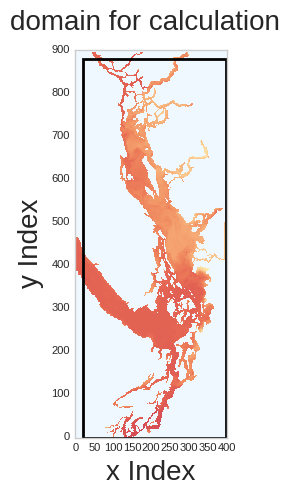

In [6]:
t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_grid_T.nc')
surfdat_1 = t_nc.variables['votemper'][0,0,:,:]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
cmap = cm.cm.matter
tplt = np.ma.masked_values(surfdat_1[:,:],0)
v_min = 2000
v_max = 2000

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=20)

ax.set_xlabel('x Index', fontsize = 20 )
ax.set_ylabel('y Index', fontsize = 20 )

pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='k',facecolor='none')
ax.add_patch(pat)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cmap.set_bad('aliceblue')
plt.suptitle('domain for calculation',fontsize=20)


In [7]:
stor_mol_BR = BR_nc['model_output']['stor_mol_BR']
stor_mol_surf_BR = BR_nc['model_output']['stor_mol_surf_BR']
stor_20_BR = BR_nc['model_output']['stor_mol_20_BR']
stor_20_100_BR = BR_nc['model_output']['stor_mol_20_100_BR']
stor_deep_BR = BR_nc['model_output']['stor_mol_deep_BR']
stor_flx_BR = BR_nc['model_output']['stor_flx_BR']
stor_trans_BR =BR_nc['model_output']['stor_trans_BR']
stor_trans_BR_JS =BR_nc['model_output']['stor_trans_BR_JS']

ts_BR = np.arange(0,np.size(stor_trans_BR),1)


stor_mol_PI = PI_nc['model_output']['stor_mol_PI']
stor_mol_surf_PI = PI_nc['model_output']['stor_mol_surf_PI']
stor_20_PI = PI_nc['model_output']['stor_mol_20_PI']
stor_20_100_PI = PI_nc['model_output']['stor_mol_20_100_PI']
stor_deep_PI = PI_nc['model_output']['stor_mol_deep_PI']
stor_flx_PI = PI_nc['model_output']['stor_flx_PI']
stor_trans_PI =PI_nc['model_output']['stor_trans_PI']
stor_trans_PI_JS =PI_nc['model_output']['stor_trans_PI_JS']

ts_PI = np.arange(0,np.size(stor_trans_BR),1)

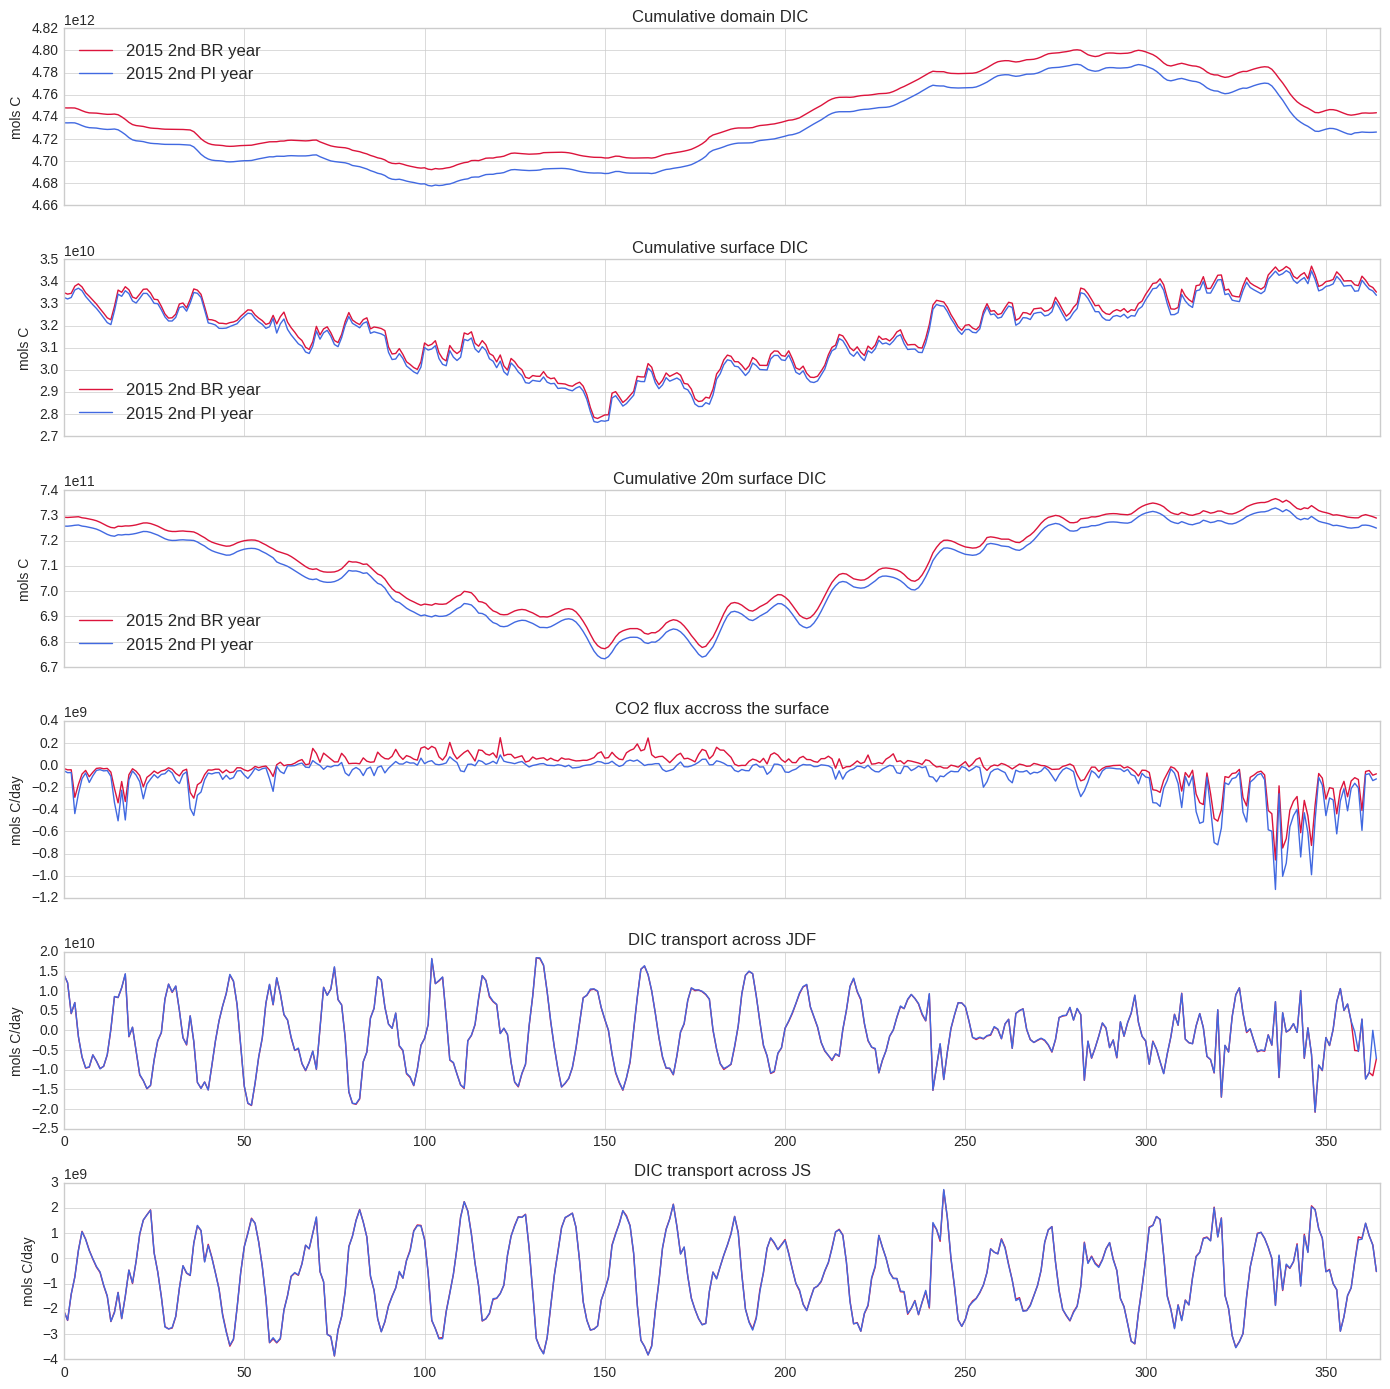

In [8]:
figstring = 'this'
fig = plt.figure(figsize=(10*1.4,10*1.4))

ax = fig.add_subplot(6,1,1)
ax.plot(ts_BR,stor_mol_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_mol_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')

ax = fig.add_subplot(6,1,2)
ax.plot(ts_BR,stor_mol_surf_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_mol_surf_PI,color = 'royalblue',label = '2015 2nd PI year')
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.xlim([0,365])
plt.title('Cumulative surface DIC ')

ax = fig.add_subplot(6,1,3)
ax.plot(ts_BR,stor_20_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_20_PI,color = 'royalblue',label = '2015 2nd PI year')
ax.legend(loc = 'best')
ax.set_ylabel('mols C')
plt.xlim([0,365])
ax.set_xticklabels([])
plt.title('Cumulative 20m surface DIC ')
 
ax = fig.add_subplot(6,1,4)
ax.plot(ts_BR,stor_flx_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_flx_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(6,1,5)
ax.plot(ts_BR,stor_trans_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_trans_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(6,1,6)
ax.plot(ts_BR,stor_trans_BR_JS,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_trans_PI_JS,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JS')
plt.tight_layout()

#t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)


In [21]:
stor_flx_ar = stor_flx_BR[:]

type(stor_flx_ar)

numpy.ndarray

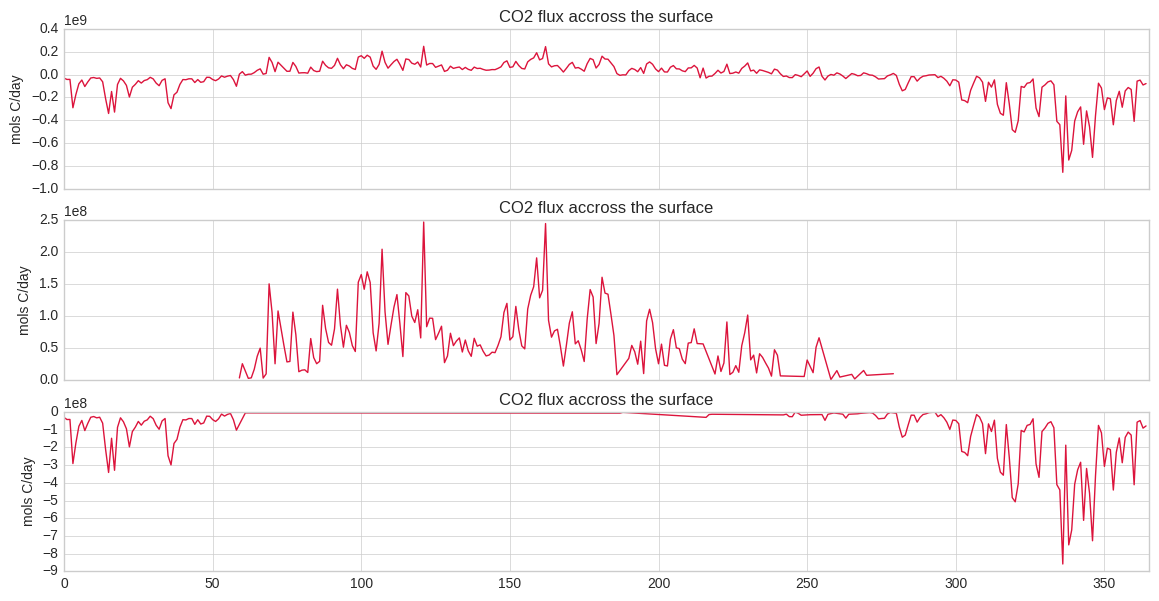

In [50]:
fig = plt.figure(figsize=(10*1.4,5*1.4))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_BR,stor_flx_ar,color = 'crimson',label = '2015 2nd BR year')
#ax.plot(ts_BR,stor_flx_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_BR[stor_flx_ar>0],stor_flx_ar[stor_flx_ar>0],color = 'crimson',label = '2015 2nd BR year')
#ax.plot(ts_BR,stor_flx_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR[stor_flx_ar<0],stor_flx_ar[stor_flx_ar<0],color = 'crimson',label = '2015 2nd BR year')
#ax.plot(ts_BR,stor_flx_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

In [23]:
abs_flux = np.abs(stor_flx_BR)
large0pt2_flux_day = np.where(abs_flux > 0.2e9)
large0pt2_flux_day = np.where(abs_flux > 0.2e9)
print(large_flux_day)
print(np.size(large_flux_day))

(array([  3,  14,  15,  17,  35,  36, 107, 121, 162, 302, 303, 304, 310,
       314, 315, 316, 318, 319, 320, 321, 327, 328, 334, 335, 336, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 350, 351, 352, 353,
       354, 356, 360]),)
42


In [48]:
ts_pos = ts_BR[stor_flx_ar>0]
flx_ar_pos = stor_flx_ar[stor_flx_ar>0]

flx_ar_thres = flx_ar_pos[flx_ar_pos>0.15e9]
np.sum(flx_ar_thres)/np.sum(flx_ar_pos)
total_pos_days = np.size(flx_ar_pos)
for i in range(1,12):
    thres = i*0.025*1e9
    print('')
    print('threshold flux: '+str(thres/1e9))
    flx_ar_thres = flx_ar_pos[flx_ar_pos>thres]
    perc_flx = np.sum(flx_ar_thres)/np.sum(flx_ar_pos)
    days_thres = np.size(flx_ar_thres)
    perc_days = days_thres/total_pos_days *100
    print('% days at thres: '+str(perc_days))
    print('% flux accounted for: '+str(perc_flx))



threshold flux: 0.025
% days at thres: 80.85106382978722
% flux accounted for: 0.967143

threshold flux: 0.05
% days at thres: 58.51063829787234
% flux accounted for: 0.840688

threshold flux: 0.07500000000000001
% days at thres: 34.04255319148936
% flux accounted for: 0.613258

threshold flux: 0.1
% days at thres: 20.212765957446805
% flux accounted for: 0.428935

threshold flux: 0.125
% days at thres: 12.23404255319149
% flux accounted for: 0.295018

threshold flux: 0.15000000000000002
% days at thres: 5.319148936170213
% flux accounted for: 0.150119

threshold flux: 0.17500000000000002
% days at thres: 2.127659574468085
% flux accounted for: 0.072478

threshold flux: 0.2
% days at thres: 1.5957446808510638
% flux accounted for: 0.0568796

threshold flux: 0.225
% days at thres: 1.0638297872340425
% flux accounted for: 0.0401719

threshold flux: 0.25
% days at thres: 0.0
% flux accounted for: 0.0

threshold flux: 0.275
% days at thres: 0.0
% flux accounted for: 0.0


In [52]:
ts_neg = ts_BR[stor_flx_ar<0]
flx_ar_neg = stor_flx_ar[stor_flx_ar<0]
late_wind_ev = stor_flx_ar[338:348]
perc_flx = np.sum(late_wind_ev)/np.sum(flx_ar_neg) *100
print('perc flux late wind ev:'+str(perc_flx))
print(np.size(flx_ar_neg))

total_neg_days = np.size(flx_ar_neg)
for i in range(1,7):
    thres = -1*i*0.05*1e9
    print('')
    print('threshold flux: '+str(thres/1e9))
    flx_ar_thres = flx_ar_neg[flx_ar_neg<thres]
    perc_flx = np.sum(flx_ar_thres)/np.sum(flx_ar_neg) *100
    days_thres = np.size(flx_ar_thres)
    perc_days = days_thres/total_neg_days *100
    print('% days at thres: '+str(perc_days))
    print('% flux accounted for: '+str(perc_flx))



perc flux late wind ev:22.1453145146
177

threshold flux: -0.05
% days at thres: 55.367231638418076
% flux accounted for: 91.3405060768

threshold flux: -0.1
% days at thres: 33.89830508474576
% flux accounted for: 78.9216935635

threshold flux: -0.15000000000000002
% days at thres: 24.858757062146893
% flux accounted for: 70.0322031975

threshold flux: -0.2
% days at thres: 22.033898305084744
% flux accounted for: 66.0046875477

threshold flux: -0.25
% days at thres: 16.94915254237288
% flux accounted for: 56.8133890629

threshold flux: -0.30000000000000004
% days at thres: 12.994350282485875
% flux accounted for: 47.9133725166
